## Predicting house sale prices for Boulder County, Colorado - Modeling

### Introduction: <br>
I would like to help all market participants make better and more informed decisions when participating in Boulder County residential real estate market. 
Some important questions are: 
<dd>1. What property features are important in contributing to sales price
<dd>2. What neighbourhoods are popular and add additional value and which don’t
<dd>3. See the distribution of the properties for each area <br>
    
It can help all market participants, either people looking to enter the market and make a choice that fits their needs and budget or for people in the market to optimize their real estate asset management. 


### Feature description

The feature engineering step has already been performed in Exploratory Data Analysis section. 
Here are our numeric features: 
1. 'Eff Yr Built' - year house was built in
2. 'Above Grd SF' - Above ground area in square feet
3. 'Basemt Unf SF' - Total unfinished basement area in square feet
4. 'Basemt Fin SF' - Finished basement area in square feet
5. 'Garage SF' - Garage area in square feet
6. 'Est Land SF' - Land area in square feet
7. 'Unincorporated' - Binary variable 1 if the house is located in unincorporated land https://bouldercounty.gov/government/about-boulder-county/unincorporated-towns/
8. 'Quality_cat' - Categorical variable from 1 to 14 representing house quality
9. 'Garage Attached' - Binary variable 1 if garage is attached, 0 for all other options
10. 'Time Adjust Sales Price' - our target response variable <br>
The following are one hot encoded Design/Market Area variables.   <br>  
       'Design_1 Sty Townh'  
       'Design_Bi Level'
       'Design_Modular'
       'Design_Multi Sty'       
       'Design_Multi Sty Townh'    
       'Design_Condo'
       'Design_Paired'
       'Design_Patio'
       'Design_Ranch'
       'Design_Split level'
       
       'Market Area_101'
       'Market Area_102'
       'Market Area_103'
       'Market Area_104',
       'Market Area_105'
       'Market Area_106'
       'Market Area_107',
       'Market Area_108', 'Market Area_109', 'Market Area_401',
       'Market Area_402', 'Market Area_403', 'Market Area_404',
       'Market Area_405', 'Market Area_407', 'Market Area_501',
       'Market Area_502', 'Market Area_503', 'Market Area_505',
       'Market Area_506', 'Market Area_507', 'Market Area_630',
       'Market Area_632', 'Market Area_633', 'Market Area_634'
       
       'Property Type_DUP_TRI',
       'Property Type_RCON', 'Property Type_SFR', 'Property Type_TWNHM'



### 1. Import necessary libraries and data

In [88]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn import tree, metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold
from io import StringIO  
from IPython.display import Image  
import pydotplus
sns.set()

In [89]:
X = pd.read_csv('data/data_for_modeling.csv')

In [90]:
sorted_data = X.sort_values(by='Time Adjust Sales Price', ascending=True)
sorted_data = sorted_data.reset_index(drop=True)
sorted_data['Time Adjust Sales Price']

rows_to_keep = int(round(len(sorted_data)*0.99))
cutoff = sorted_data.loc[rows_to_keep,'Time Adjust Sales Price']
bottom_99_percent = sorted_data.iloc[:rows_to_keep, :]
print("The cutoff for bottom 99% is: ", cutoff)

The cutoff for bottom 99% is:  2561494.87482435


In [91]:
features = bottom_99_percent.loc[:,['Eff Yr Built', 'Above Grd SF', 'Basemt Fin SF', 'Basemt Unf SF',
       'Garage SF', 'Est Land SF', 'Unincorporated', 'Quality_cat',
       'Garage Attached', 'Design_1 Sty Townh', 'Design_Bi Level',
       'Design_Condo', 'Design_Modular', 'Design_Multi Sty',
       'Design_Multi Sty Townh', 'Design_Paired', 'Design_Patio',
       'Design_Ranch', 'Design_Split level', 'Market Area_101',
       'Market Area_102', 'Market Area_103', 'Market Area_104',
       'Market Area_105', 'Market Area_106', 'Market Area_107',
       'Market Area_108', 'Market Area_109', 'Market Area_401',
       'Market Area_402', 'Market Area_403', 'Market Area_404',
       'Market Area_405', 'Market Area_407', 'Market Area_501',
       'Market Area_502', 'Market Area_503', 'Market Area_505',
       'Market Area_506', 'Market Area_507', 'Market Area_630',
       'Market Area_632', 'Market Area_633', 'Market Area_634',
       'Property Type_DUP_TRI',
       'Property Type_RCON', 'Property Type_SFR', 'Property Type_TWNHM']]
Y = bottom_99_percent['Time Adjust Sales Price']


### Model 1.  Linear regression model

It is important to build linear regression model to use both as benchmark and most interpretable and computationally light model. <br>
Question 1: Do we need to standardize the variables? <br>
Answer: No. In general, you do not need to center or standardize your data for multiple regression. Different explanatory variables are almost always on different scales (i.e., measured in different units). This is not a problem; the betas are estimated such that they convert the units of each explanatory variable into the units of the response variable appropriately. 

In [92]:
X_train_const = sm.add_constant(features)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_train_const, Y, test_size = 0.25, train_size = 0.75, random_state=123)

In [94]:
model = sm.OLS(y_train, X_train)
results = model.fit()

In [95]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Time Adjust Sales Price   R-squared:                       0.846
Model:                                 OLS   Adj. R-squared:                  0.845
Method:                      Least Squares   F-statistic:                     2595.
Date:                     Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                             10:41:49   Log-Likelihood:            -2.6358e+05
No. Observations:                    19923   AIC:                         5.272e+05
Df Residuals:                        19880   BIC:                         5.276e+05
Df Model:                               42                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.297e+06   1.22e+05    -18.814      0.000   -2.54e+06   -2.06e+06
Eff Yr Built            1769.5589     86.667     20.418      0.000    1599.684    1939.434
Above Grd SF             132.1057      2.474     53.395      0.000     127.256     136.955
Basemt Fin SF             62.0575      2.522     24.606      0.000      57.114      67.001
Basemt Unf SF             -7.0288      2.610     -2.693      0.007     -12.145      -1.913
Garage SF                 49.1620      2.183     22.525      0.000      44.884      53.440
Est Land SF                3.3997      0.161     21.173      0.000       3.085       3.714
Unincorporated          4.431e+04   6257.167      7.082      0.000     3.2e+04    5.66e+04
Quality_cat             4.848e+04    725.478     66.821      0.000    4.71e+04    4.99e+04
Garage Attached        -4.628e+04   2848.591    -16.248      0.000   -5.19e+04   -4.07e+04
Design_1 Sty Townh     -2.779e+05   1.75e+04    -15.900      0.000   -3.12e+05   -2.44e+05
Design_Bi Level        -1.099e+05   1.35e+04     -8.139      0.000   -1.36e+05   -8.34e+04
Design_Condo           -4.892e+05   2.26e+04    -21.644      0.000   -5.34e+05   -4.45e+05
Design_Modular         -2.957e+05   4.93e+04     -5.995      0.000   -3.92e+05   -1.99e+05
Design_Multi Sty       -1.706e+05   1.26e+04    -13.522      0.000   -1.95e+05   -1.46e+05
Design_Multi Sty Townh -2.985e+05    1.7e+04    -17.543      0.000   -3.32e+05   -2.65e+05
Design_Paired          -1.983e+05   1.52e+04    -13.009      0.000   -2.28e+05   -1.68e+05
Design_Patio           -2.023e+05   1.58e+04    -12.790      0.000   -2.33e+05   -1.71e+05
Design_Ranch           -1.365e+05   1.24e+04    -10.977      0.000   -1.61e+05   -1.12e+05
Design_Split level     -1.184e+05   1.28e+04     -9.220      0.000   -1.44e+05   -9.32e+04
Market Area_101         4.923e+05   9336.417     52.729      0.000    4.74e+05    5.11e+05
Market Area_102         1.811e+05   8963.718     20.200      0.000    1.63e+05    1.99e+05
Market Area_103         4.043e+05   8998.298     44.927      0.000    3.87e+05    4.22e+05
Market Area_104         8882.3006   1.06e+04      0.840      0.401   -1.18e+04    2.96e+04
Market Area_105        -1.134e+04   8903.349     -1.274      0.203   -2.88e+04    6108.286
Market Area_106          2.65e+05   8964.836     29.562      0.000    2.47e+05    2.83e+05
Market Area_107         3.388e+05   9699.870     34.933      0.000     3.2e+05    3.58e+05
Market Area_108        -1.271e+05    1.8e+04     -7.053      0.000   -1.62e+05   -9.18e+04
Market Area_109         8.569e+04   1.95e+04      4.395      0.000    4.75e+04    1.24e+05
Market Area_401        -2.211e+05   9722.866    -22.737      0.000    -2.4e+05   -2.02e+05
Market Area_402        -2

T-stats look good for most coefficients except Market Area_104, Market Area_105.
The Durbin-Watson is 1.978 and between 1.5 and 2.5, so autocorrelation is likely not a cause for concern.


In [96]:
linear_pred = results.predict(X_test)
R2 = 1 - (np.sum((y_test-linear_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Test set R2: ",R2)
rmse = mean_squared_error(y_test, linear_pred, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")

Test set R2:  0.8399315579756943
RMSE of the base model: 136589.424


In [97]:
residuals = np.asarray(y_test - results.predict(X_test))

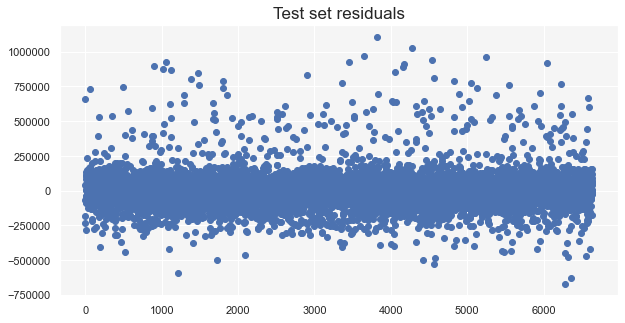

Max residual:  1106173.2765834585


In [98]:
fig = plt.figure(figsize=(10, 5))
plt.ticklabel_format(useOffset=False, style='plain')
plt.gca().set_facecolor('whitesmoke')
plt.plot(residuals, 'bo')
plt.title('Test set residuals', fontsize=17)
plt.show()
print("Max residual: ",max(residuals))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


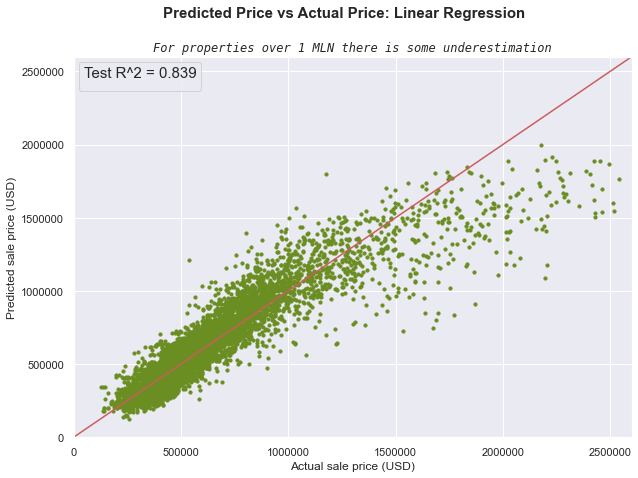

In [100]:
sns.set()
fig = plt.figure(figsize=(10, 7))

# Build a scatterplot
x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')
plt.scatter(y_test, results.predict(X_test),s=10, c='olivedrab')
plt.xlim(0,2600000)
plt.ylim(0,2600000)

plt.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')

plt.suptitle('Predicted Price vs Actual Price: Linear Regression', fontsize=15,fontweight='bold')
plt.title("For properties over 1 MLN there is some underestimation",style='italic',family='monospace')

plt.legend(title='Test R^2 = 0.839', title_fontsize = 15) 
plt.show()

Clearly, there is a problem. The more expensive properties are not properly priced under linear regression model, howewer for properties under 1.3 million USD the fit is great. 


### Additional feature engineering: Principal Component Analysis <br>
We perform exploratory PCA to see if the features could be combined in Principal Components which represent significant proportion of the variation.

In [101]:
#remove the constant for sm linear regression
X_test = X_test.iloc[:, 1:]
X_train = X_train.iloc[:, 1:]

First, we choose large number of principal components (15) to see what the relationship is between them and if there are any drops in variation. 

In [102]:
scaling = StandardScaler()
scaling.fit(X_train)
Scaled_data = scaling.transform(X_train)

principal = PCA(n_components = 15)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)

In [103]:
principal.explained_variance_ratio_

array([0.11550684, 0.0717166 , 0.05939262, 0.04166939, 0.03343502,
       0.03051588, 0.02917494, 0.02579796, 0.02421005, 0.0238368 ,
       0.02348456, 0.0231082 , 0.02256692, 0.02200613, 0.02195326])

In [104]:
cumulative = np.cumsum(principal.explained_variance_ratio_)

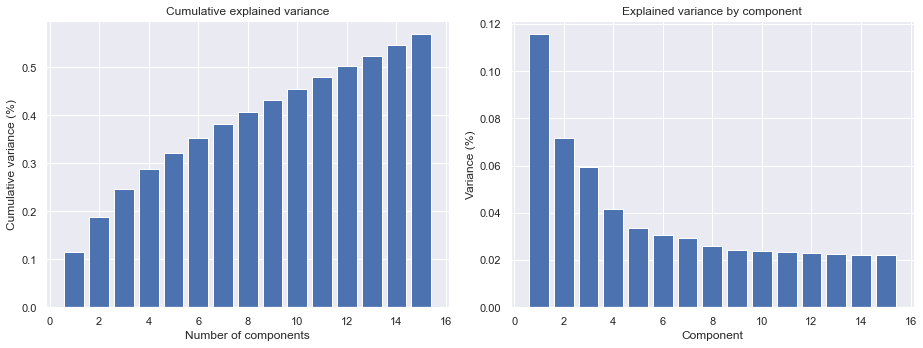

In [105]:
fig.suptitle('Principal component analysis')

plt.subplots(figsize=(13, 5))
plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.bar(range(1,16), cumulative )
plt.title('Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance (%)')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).bar(range(1,16), principal.explained_variance_ratio_ )
plt.title('Explained variance by component')
plt.xlabel('Component')
plt.ylabel('Variance (%)')

plt.tight_layout()

In [106]:
#Check the values of eigen vectors
principal.components_[0]

array([ 0.14748057,  0.29924301,  0.17121146,  0.19330604, -0.04178429,
        0.23747119, -0.00823874,  0.18714772,  0.25798049, -0.02690056,
        0.01184209, -0.35547527,  0.00042384,  0.2566881 , -0.09679639,
        0.02143518,  0.01765675,  0.08231759,  0.03235031,  0.01220211,
        0.04423672,  0.03165187,  0.00420804,  0.02567321,  0.02001405,
        0.01245511, -0.04994224, -0.03335304,  0.0468304 ,  0.06357909,
        0.0492262 ,  0.10954166,  0.08387722, -0.05641739,  0.05704377,
        0.03470634,  0.09591806,  0.02294767, -0.05446097,  0.09013341,
       -0.25422331, -0.16325813, -0.13828669, -0.01822387, -0.00832057,
       -0.35547527,  0.37369891, -0.10119115])

Text(0.5, 1.0, 'First two principal components')

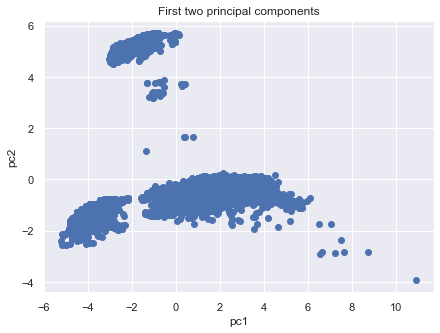

In [107]:
plt.figure(figsize=(7,5))
plt.scatter(x[:,0], x[:,1])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title("First two principal components")

Text(0.5, 0.92, 'First 3 principal components')

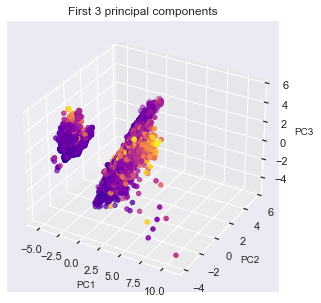

In [108]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,5))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=y_train, cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
plt.title("First 3 principal components")

In [109]:
# check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)

[0.11550684 0.0717166  0.05939262 0.04166939 0.03343502 0.03051588
 0.02917494 0.02579796 0.02421005 0.0238368  0.02348456 0.0231082
 0.02256692 0.02200613 0.02195326]


Well, it looks like first 3,5 or 10 components don't explain much of the variance, certainly not around 80% level. I would not use them in this case and instead use original features. The loss in variance explained and interpretability is too high compared to the risk of overfitting. 

### Model 2. Decision tree 
Entropy model - no max_depth

In [110]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeRegressor()
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred =pd.Series(y_pred)
entr_model

DecisionTreeRegressor()

In [111]:
#tree.plot_tree(entr_model)

In [112]:
R2 = 1 - (np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Test set R2: ",R2)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE : {rmse:.3f}")


Test set R2:  0.5745009817281557
RMSE : 129111.597


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


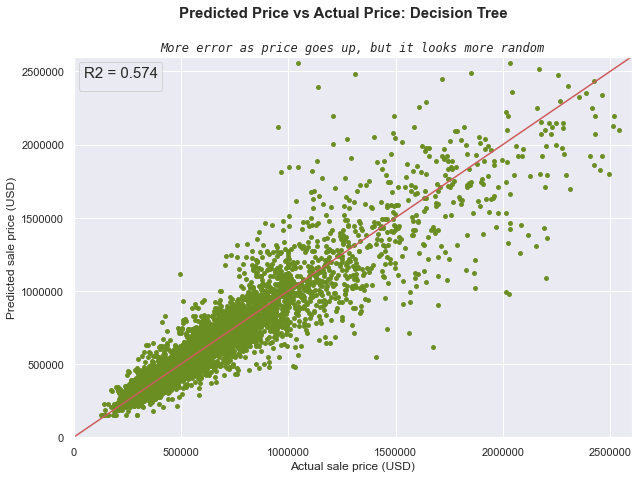

In [114]:
sns.set()
fig = plt.figure(figsize=(10, 7))

# Build a scatterplot
x = np.linspace(0,2600000,)
plt.plot(x,x, color = 'indianred')
plt.ylim((0,2600000))
plt.xlim((0,2600000))
plt.scatter(y_test, y_pred, s=15,color='olivedrab')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')
plt.suptitle('Predicted Price vs Actual Price: Decision Tree', fontsize=15,fontweight='bold')
plt.title("More error as price goes up, but it looks more random",style='italic',family='monospace')


plt.legend(title='R2 = 0.574', title_fontsize = 15) 

plt.show()

R squared of 0.573 vs 0.839 for linear regression - not an improvement. However, it does look like the model mistreats everyone equally. 

### Model 3. Polynomial regression

In [115]:
to_square =X_train.loc[:,['Eff Yr Built', 'Above Grd SF', 'Basemt Fin SF', 'Basemt Unf SF',
       'Garage SF', 'Est Land SF',  'Quality_cat']]

In [116]:
squared = to_square.apply(lambda x: x**2)
X_poly = pd.concat([X_train, squared], axis = 1)

In [117]:
to_square_test =X_test.loc[:,['Eff Yr Built', 'Above Grd SF', 'Basemt Fin SF', 'Basemt Unf SF',
       'Garage SF', 'Est Land SF',  'Quality_cat']]
squared_test = to_square_test.apply(lambda x: x**2)
X_test_poly = pd.concat([X_test, squared_test], axis=1)

Well it looks like polynomial regression did a great job, with R^2 at 0.876 versus 0.722 for Descision tree and 0.760 for linear regression. To check for overfitting, I would like to calculate R2 on train set to see the difference between test and train set. 

In [118]:
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [119]:
polynom = lin2.predict(X_test_poly) 
R2 = 1 - (np.sum((y_test-polynom)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Test set R2: ", R2)
rmse = mean_squared_error(y_test, polynom, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")

Test set R2:  0.8562572118276516
RMSE of the base model: 129436.645


In [120]:
poly_train = lin2.predict(X_poly) # predict on the test set
R2 = 1 - (np.sum((y_train-poly_train)**2)/np.sum((y_train-np.mean(y_train))**2))
print("Train set R2:", R2)


Train set R2: 0.8652325745446767


Well R2 on train set is 0.865 and R2 on test set is 0.856, so there's very little overfitting going on. Let's do predictions vs actuals plot.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


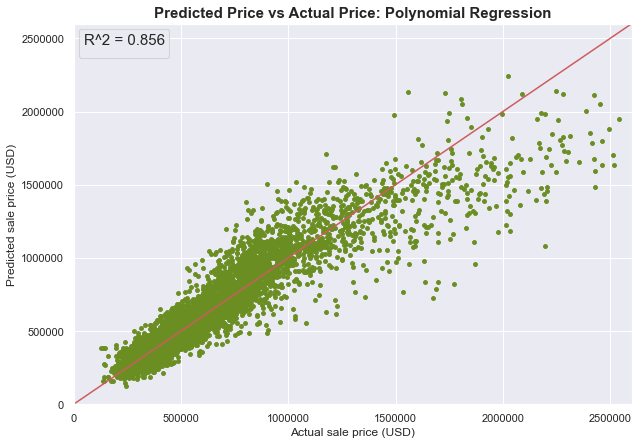

In [176]:
sns.set()
fig = plt.figure(figsize=(10, 7))

x = np.linspace(1,2600000,)
plt.plot(x,x, color = 'indianred')
plt.scatter(y_test, polynom,s=15, c='olivedrab')
plt.xlim(0,2600000)
plt.ylim(0,2600000)

plt.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')
plt.title('Predicted Price vs Actual Price: Polynomial Regression', fontsize=15,fontweight='bold')
#plt.title("Large error for higher prices, tends to underestimate",style='italic',family='monospace')
plt.legend(title='R^2 = 0.856', title_fontsize = 15) 
plt.show()



Well this looks much much better, however the 3 million dollars and up the relationship doesn't seem to hold up as well, but those observations are not very numerous. I would like to investigate them and see what could drive that.  

## Model 4. Multiple linear regression model with log transformed response

https://statmodeling.stat.columbia.edu/2019/08/21/you-should-usually-log-transform-your-positive-data/

From page 59:

It commonly makes sense to take the logarithm of outcomes that are all-positive.

If a variable has a narrow dynamic range (that is, if the ratio between the high and low values is close to 1), then it will not make much of a difference in fit if the regression is on the logarithmic or the original scale. . . . In such a situation, it might seem to make sense to stay on the original scale for reasons of simplicity. However, the logarithmic transformation can make sense even here, because coefficients are often more easily understood on the log scale. . . . For an input with a larger amount of relative variation (for example, heights of children, or weights of animals), it would make sense to work with its logarithm immediately, both as an aid in interpretation and likely an improvement in fit too.

In [178]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log10)
y_train_log  = transformer.transform(y_train)
y_test_log = transformer.transform(y_test)

In [179]:
lin2 = LinearRegression()
reg = lin2.fit(X_train, y_train_log)
log_test = reg.predict(X_test) # predict on the test set
R2 = 1 - (np.sum((y_test_log-log_test)**2)/np.sum((y_test_log-np.mean(y_test_log))**2))
print("Test set R^2: ",R2)

log_train = reg.predict(X_train) # predict on the train set
R2 = 1 - (np.sum((y_train_log-log_train)**2)/np.sum((y_train_log-np.mean(y_train_log))**2))
print("Train set R^2: ",R2)


Test set R^2:  0.8789810368865549
Train set R^2:  0.8841745143133248


In [180]:
predicted_prices =10**log_test
predicted_prices

array([ 679220.33917249,  777465.08176085, 1284926.38003014, ...,
       1003957.04940865,  563130.65054772,  363421.29277123])

In [181]:
R2 = 1 - np.sum((y_test -predicted_prices)**2)/np.sum((y_test-np.mean(y_test))**2)
print("Test set R^2: ", R2)
RMSE = mean_squared_error(y_test, predicted_prices, squared=False)
print("RMSE: ", RMSE)

Test set R^2:  0.8570183816504439
RMSE:  129093.48310920196


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


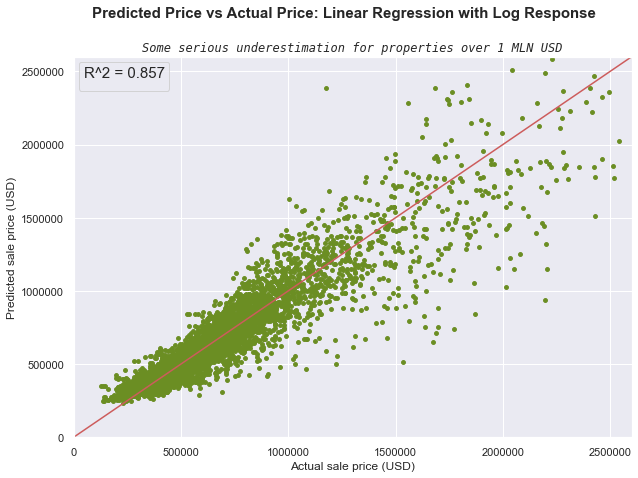

In [182]:
fig = plt.figure(figsize=(10, 7))

# Build a scatterplot
x = np.linspace(1,2600000,)
plt.plot(x,x, color = 'indianred')

plt.scatter(y_test, predicted_prices,s=15, c='olivedrab')
plt.xlim(0,2600000)
plt.ylim(0,2600000)

plt.ticklabel_format(useOffset=False, style='plain')

# Label it nicely
plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')

plt.suptitle('Predicted Price vs Actual Price: Linear Regression with Log Response', fontsize=15,fontweight='bold')
plt.title("Some serious underestimation for properties over 1 MLN USD",style='italic',family='monospace')

plt.legend(title='R^2 = 0.857', title_fontsize = 15) 
plt.show()

In [127]:
#6-fold cross validation of log model
transformer = FunctionTransformer(np.log10)
y_log  = transformer.transform(Y)
transformer = FunctionTransformer(np.log10)
y_log  = transformer.transform(Y)

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)
reg = LinearRegression()
cv_scores = cross_val_score(reg, features, y_log, cv=kf)
print(cv_scores)
print("Mean R^2: ",np.mean(cv_scores))
print("Standard deviation R^2: ",np.std(cv_scores))
print(np.percentile(cv_scores, [2.5, 97.5]))



[0.87876872 0.8845846  0.87815604 0.88742065 0.88156799 0.88446125]
Mean R^2:  0.8824932090238553
Standard deviation R^2:  0.0033182767675275318
[0.87823262 0.88706615]


### Refit the model with stats models to get the summary output

In [128]:
X_train_const = sm.add_constant(X_train)
transformer = FunctionTransformer(np.log10)
y_train_log  = transformer.transform(y_train)

In [130]:
model = sm.OLS(y_train_log,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Time Adjust Sales Price   R-squared:                       0.884
Model:                                 OLS   Adj. R-squared:                  0.884
Method:                      Least Squares   F-statistic:                     3613.
Date:                     Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                             10:43:26   Log-Likelihood:                 25266.
No. Observations:                    19923   AIC:                        -5.045e+04
Df Residuals:                        19880   BIC:                        -5.011e+04
Df Model:                               42                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Eff Yr Built               0.0019   4.38e-05     42.823      0.000       0.002       0.002
Above Grd SF            7.469e-05   1.25e-06     59.745      0.000    7.22e-05    7.71e-05
Basemt Fin SF           3.665e-05   1.27e-06     28.760      0.000    3.42e-05    3.92e-05
Basemt Unf SF           6.646e-06   1.32e-06      5.039      0.000    4.06e-06    9.23e-06
Garage SF               4.063e-05    1.1e-06     36.839      0.000    3.85e-05    4.28e-05
Est Land SF             1.408e-06   8.11e-08     17.352      0.000    1.25e-06    1.57e-06
Unincorporated             0.0242      0.003      7.656      0.000       0.018       0.030
Quality_cat                0.0234      0.000     63.935      0.000       0.023       0.024
Garage Attached           -0.0097      0.001     -6.737      0.000      -0.013      -0.007
Design_1 Sty Townh         0.5430      0.027     20.403      0.000       0.491       0.595
Design_Bi Level            0.4161      0.018     23.156      0.000       0.381       0.451
Design_Condo               0.7483      0.039     19.329      0.000       0.672       0.824
Design_Modular             0.2186      0.030      7.262      0.000       0.160       0.278
Design_Multi Sty           0.3901      0.018     21.887      0.000       0.355       0.425
Design_Multi Sty Townh     0.5452      0.027     20.465      0.000       0.493       0.597
Design_Paired              0.3671      0.018     19.848      0.000       0.331       0.403
Design_Patio               0.3928      0.018     21.442      0.000       0.357       0.429
Design_Ranch               0.4110      0.018     23.172      0.000       0.376       0.446
Design_Split level         0.4107      0.018     23.019      0.000       0.376       0.446
Market Area_101            0.4520      0.009     50.001      0.000       0.434       0.470
Market Area_102            0.3016      0.009     32.837      0.000       0.284       0.320
Market Area_103            0.3918      0.009     42.962      0.000       0.374       0.410
Market Area_104            0.2783      0.010     29.280      0.000       0.260       0.297
Market Area_105            0.2550      0.009     28.222      0.000       0.237       0.273
Market Area_106            0.3791      0.009     41.944      0.000       0.361       0.397
Market Area_107            0.3963      0.009     42.541      0.000       0.378       0.415
Market Area_108            0.1742      0.012     14.799      0.000       0.151       0.197
Market Area_109            0.3200      0.012     25.915      0.000       0.296       0.344
Market Area_401            0.1308      0.009     13.918      0.000       0.112       0.149
Market Area_402            0.0956      0.009     10.476      0.000       0.078       0.113
Market Area_403          

In [131]:
results.params
new_coefs =10 **(results.params)
print(new_coefs)
X_test.shape
new_coefs.shape
predicted_prices= np.matmul(X_test , new_coefs)

Eff Yr Built               1.004328
Above Grd SF               1.000172
Basemt Fin SF              1.000084
Basemt Unf SF              1.000015
Garage SF                  1.000094
Est Land SF                1.000003
Unincorporated             1.057324
Quality_cat                1.055451
Garage Attached            0.977919
Design_1 Sty Townh         3.491791
Design_Bi Level            2.606569
Design_Condo               5.601320
Design_Modular             1.654207
Design_Multi Sty           2.455348
Design_Multi Sty Townh     3.509538
Design_Paired              2.328853
Design_Patio               2.470759
Design_Ranch               2.576532
Design_Split level         2.574308
Market Area_101            2.831541
Market Area_102            2.002781
Market Area_103            2.464868
Market Area_104            1.898087
Market Area_105            1.799045
Market Area_106            2.393929
Market Area_107            2.490661
Market Area_108            1.493409
Market Area_109            2

How would you interpret the linear regression coefficient of the regression model where output variable was log transformed
When the output variable in a linear regression model is log-transformed, the interpretation of the regression coefficient changes slightly. Specifically, the coefficient represents the change in the log of the dependent variable for a one-unit change in the independent variable. To interpret the coefficient in a meaningful way, you need to exponentiate it to get back to the original scale.

For example, suppose you have a linear regression model with a log-transformed dependent variable, Y, and an independent variable, X, and the coefficient for X is 0.5. In this case, we can interpret the coefficient as follows:

For a one-unit increase in X, the log of Y is expected to increase by 0.5 units (assuming all other variables are held constant). To get back to the original scale, we need to exponentiate both sides of the equation. This gives us:

exp(0.5) = 1.65

So, a one-unit increase in X is expected to result in a 1.65-fold increase in Y (assuming all other variables are held constant). Alternatively, we could say that the expected percentage change in Y for a one-unit increase in X is 65%.

It's important to note that the interpretation of the coefficient in a log-transformed model is different from the interpretation in a model where the dependent variable is not log-transformed. In the latter case, the coefficient represents the expected change in Y for a one-unit increase in X. However, in a log-transformed model, the coefficient represents the expected change in the log of Y.

All variables are significant except Design_Det 1 Sty Condo. Durbin Watson is great.  R^2 is 0.894. <br>
However, there is an interesting thing going on with the coefficient values. 
Largest coefficients are for Market Areas ranging from 1.83 to 0.4, meaning being in a certain market area increases the value by 183% or decreases by 40%. <br>
All positive, but very small increases for year built and square footage variables.<br>
Extra 1000 SF of the house yields 7.7% increase in value.<br>
Extra 1000 SF increase in finished basement yields 3.1% in value.<br>
Extra 1000SF of garage yields 3.7% of value.<br>
Unfinished basement yields only 0.31% of the price increase.<br>
And one year of the house yields 0.2%
<br>
One level increase in quality leads to 2.5% increase in price. <br>

### Model 5. XGBoost

In [159]:
import xgboost as xgb
import pandas as pd

housing_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

lambdas = [1, 10, 100]
gammas =[0, 10, 100]
etas =[0, 0.2, 0.5]

params = {"objective":"reg:squarederror","max_depth":4}

rmses = []
parameters =[]

for l1 in lambdas:
    for g1 in gammas:
        for e1 in etas:
            params["reg_lambda"] = l1
            params['min_split_loss'] = g1
            params['learning_rate'] = e1
            
            cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=6, num_boost_round=15, early_stopping_rounds = 10, metrics="rmse", as_pandas=True, seed=123)

            rmses.append(cv_results["test-rmse-mean"].tail(1).values[0])

            parameters.append(params)


So best rmse is 164751 for model with {'objective': 'reg:squarederror',
  'max_depth': 4,
  'reg_lambda': 100,
  'min_split_loss': 100,
  'learning_rate': 0.5}. 

In [160]:
print(params)
print(rmses)

{'objective': 'reg:squarederror', 'max_depth': 4, 'reg_lambda': 100, 'min_split_loss': 100, 'learning_rate': 0.5}
[716118.1941956909, 150248.6232167142, 119333.95553805825, 716118.1941956909, 150248.6232167142, 119333.95553805825, 716118.1941956909, 150248.6232167142, 119333.95553805825, 716118.1941956909, 156284.85162691015, 123442.93523853912, 716118.1941956909, 156284.85162691015, 123442.93523853912, 716118.1941956909, 156284.85162691015, 123442.93523853912, 716118.1941956909, 173982.65657332158, 134224.19484884405, 716118.1941956909, 173982.65657332158, 134224.19484884405, 716118.1941956909, 173982.65657332158, 134224.19484884405]


In [161]:
print(min(rmses))

119333.95553805825


In [162]:
best_params={'objective': 'reg:squarederror',
  'max_depth': 4,
  'reg_lambda': 1,
  'min_split_loss': 100,
  'learning_rate': 0.5}

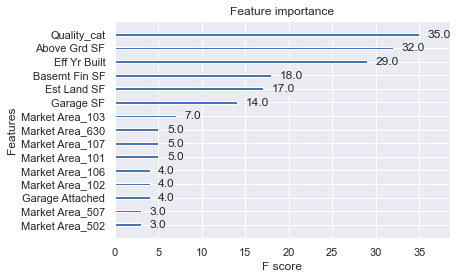

In [163]:
progress = dict()
xg_reg = xgb.train(params=best_params, dtrain=housing_dmatrix, num_boost_round=15,evals_result=progress)
sns.set()
xgb.plot_importance(xg_reg,max_num_features=15)#, show_values=False, importance_type='gain'
plt.show()

In [164]:
from sklearn.metrics import mean_squared_error
dtest_reg = xgb.DMatrix(data=X_test, label=y_test)
preds = xg_reg.predict(dtest_reg)
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 120181.458


In [166]:
R2 =1- ((rmse)**2)*len(y_test)/ np.sum((y_test- np.mean(y_test))**2)
print('Test XGBoost R2: ', R2)

Test XGBoost R2:  0.8760785436549805


#### Fit XGBoost final model

In [138]:
# Create the DMatrix: housing_dmatrix

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)

dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

reg_params = [0.5, 0.7, 0.9]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":6}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["eta"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results = xgb.cv(dtrain=dtrain_reg, params=params, nfold=6, num_boost_round=15, metrics="rmse", as_pandas=True, seed=123,early_stopping_rounds = 10)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of eta:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["eta", "rmse"]))

Best rmse as a function of eta:
   eta           rmse
0  0.5  109778.645576
1  0.7  111058.927040
2  0.9  113094.137640


RMSE of the base model: 114524.052


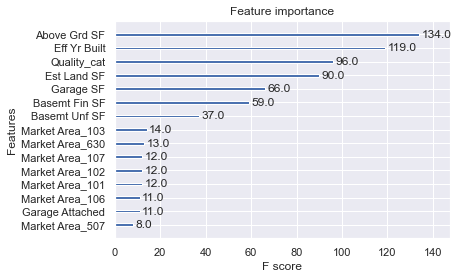

In [171]:
params = {"objective":"reg:squarederror","max_depth":6, "eta":0.5}
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=15,
)

preds = model.predict(dtest_reg)
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(model,max_num_features=15)
plt.show()

In [174]:
R2 = 1- ((rmse**2)*len(y_test))/ (np.sum((y_test -np.mean(y_test))**2))
print('XGBoost R2: ', R2)


XGBoost R2:  0.887470865618757


In [175]:
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE : {rmse:.3f}")

RMSE : 114524.052


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


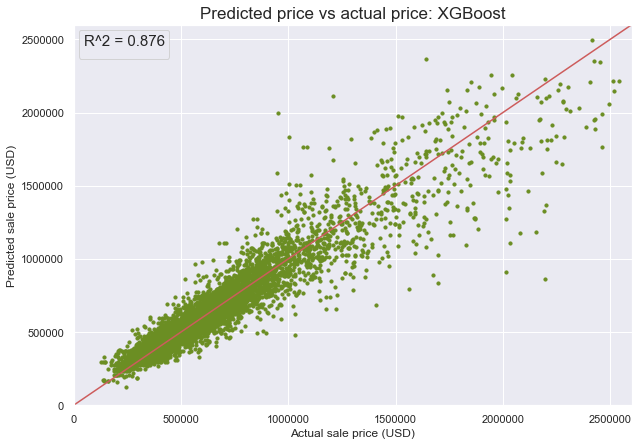

In [185]:
fig = plt.figure(figsize=(10, 7))
x = np.linspace(1,2600000,)
plt.plot(x,x, color = 'indianred')

plt.scatter(y_test, preds,s=10, c='olivedrab')
plt.xlim(0,2600000)
plt.ylim(0,2600000)

plt.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')
plt.title('Predicted price vs actual price: XGBoost', fontsize=17)

plt.legend(title='R^2 = 0.876', title_fontsize = 15) 
plt.show()

## Random forest

In [145]:
from sklearn.ensemble import RandomForestRegressor

#### Random forest parameters: <br>
n_estimators = number of trees in the forest <br>
max_features = max number of features considered for splitting a node <br>
max_depth = max number of levels in each decision tree <br>
min_samples_split = min number of data points placed in a node before the node is split <br>
min_samples_leaf = min number of data points allowed in a leaf node <br>
bootstrap = method for sampling data points (with or without replacement) <br>

In [146]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
estimator = model.estimators_[5]
estimator
preds = model.predict(X_test)
R2 = 1 - (np.sum((y_test-preds)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Random Forest Test set R^2: ",R2)

Random Forest Test set R^2:  0.9112431295231648


In [147]:
train_preds = model.predict(X_train)
R2 = 1 - (np.sum((y_train-train_preds)**2)/np.sum((y_train-np.mean(y_train))**2))
print("Random Forest Train set R^2: ",R2)

Random Forest Train set R^2:  0.9878362327482159


In [148]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = [1, 0.3]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': [1, 0.3], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [149]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [1, 0.3],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [150]:
rf_random.best_params_


{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 0.3,
 'max_depth': 80,
 'bootstrap': False}

In [151]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 59768.6047 degrees.
Accuracy = 91.29%.
Model Performance
Average Error: 55291.3132 degrees.
Accuracy = 91.92%.
Improvement of 0.69%.


So, according to our hyperparameter optimization, we can gain 0.69% in accuracy improvement. I think we could use either base model or optimized model, but the selected model is much more restrictive yet yields similar performance.  Let's use selected optimal model!

### 6-fold cross validation

In [152]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = RandomForestRegressor(n_estimators=70,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 0.3,
 max_depth= 80,
 bootstrap= False)


cv_scores = cross_val_score(reg, X_train, y_train, cv=kf)

print(cv_scores)
print("Mean R^2: ",np.mean(cv_scores))
print("Standard deviation R^2: ",np.std(cv_scores))
print(np.percentile(cv_scores, [2.5, 97.5]))

[0.91630614 0.91608195 0.92013882 0.91946204 0.92251032 0.91995044]
Mean R^2:  0.9190749528648242
Standard deviation R^2:  0.0022536731021900866
[0.91610998 0.92221388]


In [153]:
final_model= RandomForestRegressor(n_estimators=70,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 0.3,
 max_depth= 80,
 bootstrap= False)
# Train
final_model.fit(X_train, y_train)
# Extract single tree
estimator = final_model.estimators_[5]
estimator

preds = final_model.predict(X_test)
R2 = 1 - (np.sum((y_test-preds)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Random Forest Test set R^2: ", R2)





Random Forest Test set R^2:  0.9126444060814779


In [155]:
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE : {rmse:.3f}")

RMSE : 100904.277


In [ ]:
preds = final_model.predict(X_test)
R2 = 1 - (np.sum((y_test-preds)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Random Forest Test set R^2: ", R2)

In [169]:
preds_train = final_model.predict(X_train)
R2 = 1 - (np.sum((y_train-preds_train)**2)/np.sum((y_train-np.mean(y_train))**2))
print("Random Forest Train set R^2: ", R2)

Random Forest Train set R^2:  0.9936399329887886


With no splits, R^2 is at its highest level of 0.884. So when choosing an algorithms we'll account for that. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


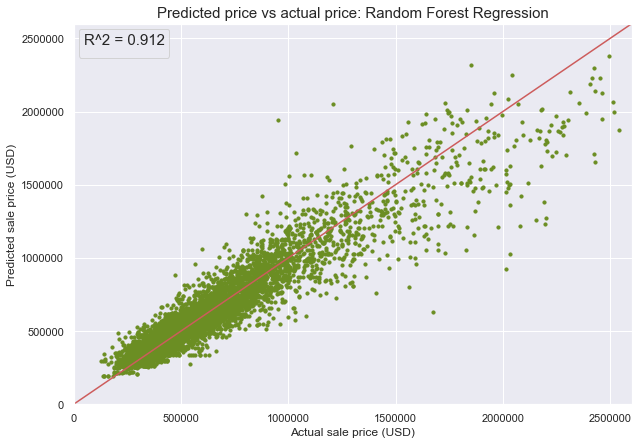

In [170]:
fig = plt.figure(figsize=(10, 7))
x = np.linspace(1,2600000,)
plt.plot(x,x, color = 'indianred')
plt.scatter(y_test, preds,s=10, c='olivedrab')
plt.xlim(0,2600000)
plt.ylim(0,2600000)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')
plt.title('Predicted price vs actual price: Random Forest Regression', fontsize=15)
plt.legend(title='R^2 = 0.912', title_fontsize = 15) 
plt.show()